# Plotly
#### A selection of features

## Load the data

In [53]:
import pandas as pd
import numpy as np

In [23]:
table = pd.read_csv('https://raw.githubusercontent.com/chumo/Data2Serve/master/transition_clusters.csv')

## From matplotlib (_static_) to Plotly (_interactive_)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Random clusters')

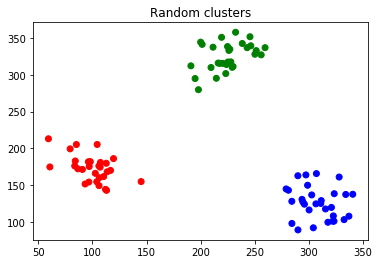

In [33]:
fig, ax = plt.subplots()
ax.scatter(table.Xf, table.Yf, c=table.color)
ax.set_title('Random clusters')

In [32]:
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

py.offline.init_notebook_mode(connected=True) # not needed in Jupyter lab, only in Jupyter notebook.

In [34]:
plotly_dict = tls.mpl_to_plotly(fig)

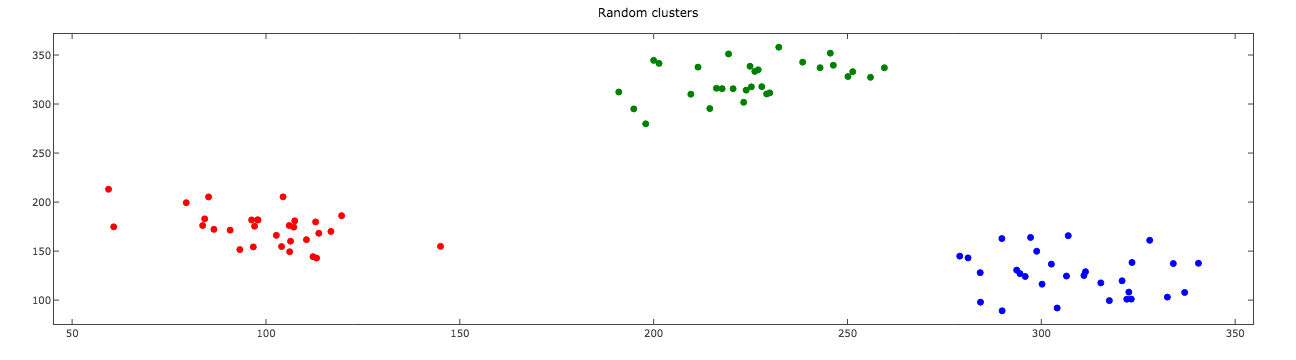

In [35]:
py.offline.iplot(plotly_dict)

## Data, Layout, Figure

The figure object is created at the end.

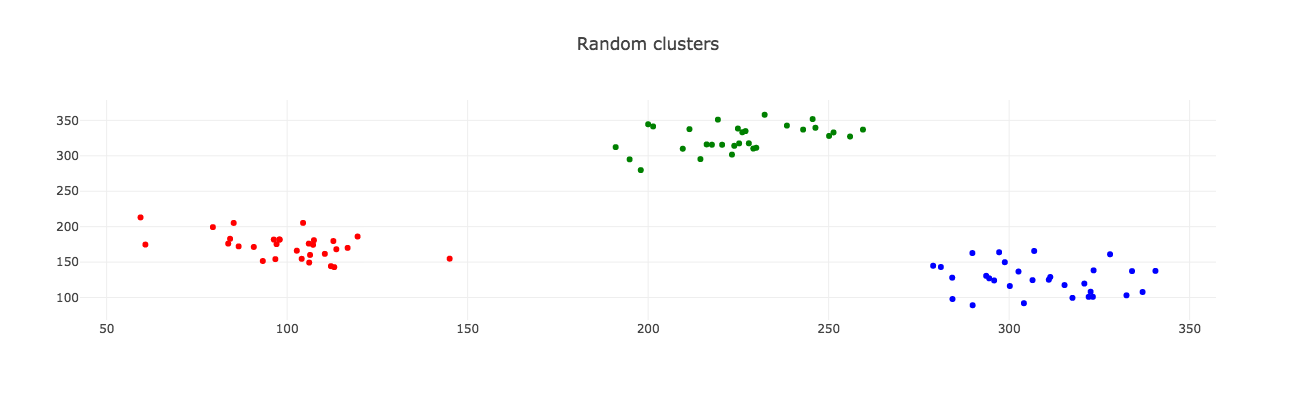

In [42]:
trace = dict(
    type= 'scatter',
    x= table.Xf,
    y= table.Yf,
    marker= dict(color=table.color),
    mode= 'markers',
)

data = [trace]

layout = dict(
    title= 'Random clusters',
    width= 500,
    height= 400,
)

fig = dict(
    data= data,
    layout= layout,
)

py.offline.iplot(fig)

In [ ]:
go.Histogram()

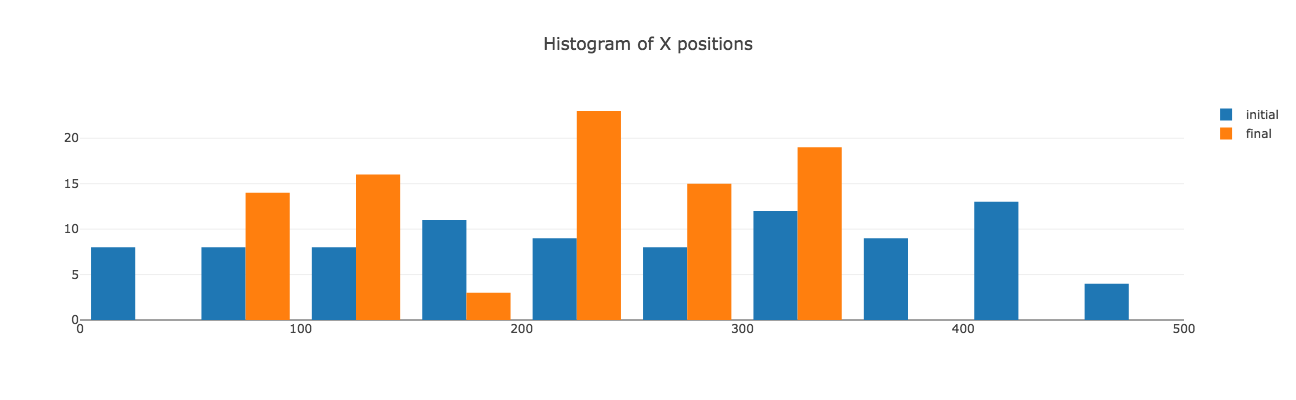

In [110]:
trace1 = dict(
    type= 'histogram',
    x= table.Xi,
    nbinsx=10,
    name='initial'
)

trace2 = dict(
    type= 'histogram',
    x= table.Xf,
    nbinsx=10,
    name='final'
)

data = [trace1, trace2]

layout = dict(
    title= 'Histogram of X positions',
    width= 500,
    height= 400,
)

fig = dict(
    data= data,
    layout= layout,
)

py.offline.iplot(fig)

## Data, Layout, Frames, Figure

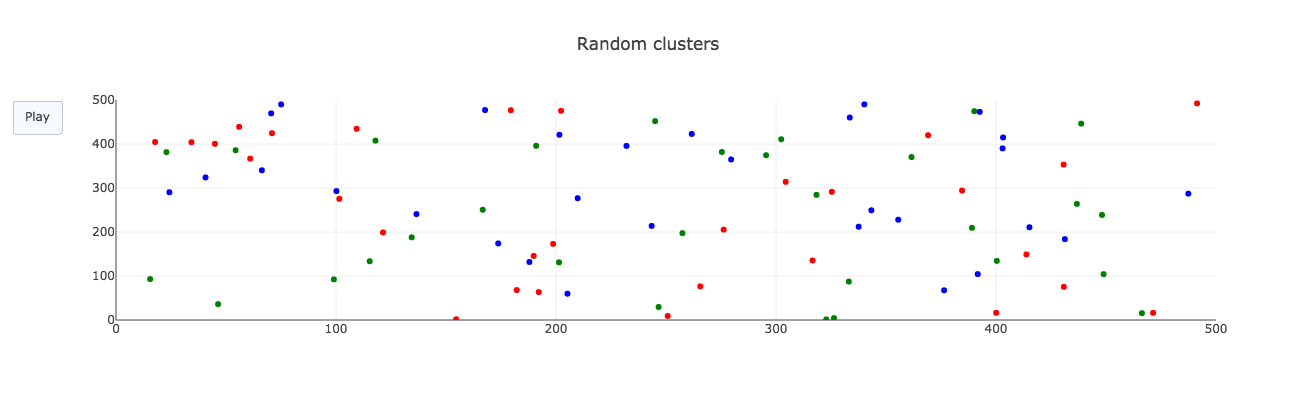

In [132]:
trace1 = dict(
    type= 'scatter',
    x= table.Xi,
    y= table.Yi,
    marker= dict(color=table.color),
    mode= 'markers',
)

trace2 = dict(
    type= 'scatter',
    x= table.Xf,
    y= table.Yf,
    marker= dict(color=table.color),
    mode= 'markers',
)

data = [trace1]

layout = dict(
    title= 'Random clusters',
    width= 500,
    height= 400,
    xaxis=dict(range=[0, 500]),
    yaxis=dict(range=[0, 500]),
    updatemenus= [dict(
        type= 'buttons',
        buttons= [{'label': 'Play', 'method': 'animate', 'args': [None]}],
    )]
)

frames = [
    dict(data=[{'x':table.Xi, 'y':table.Yi}]),
    dict(data=[{'x':table.Xf, 'y':table.Yf}]),
]

fig = dict(
    data= data,
    layout= layout,
    frames=frames,
)

py.offline.iplot(fig)

## Subplots

The figure object is created at the beginning.

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]



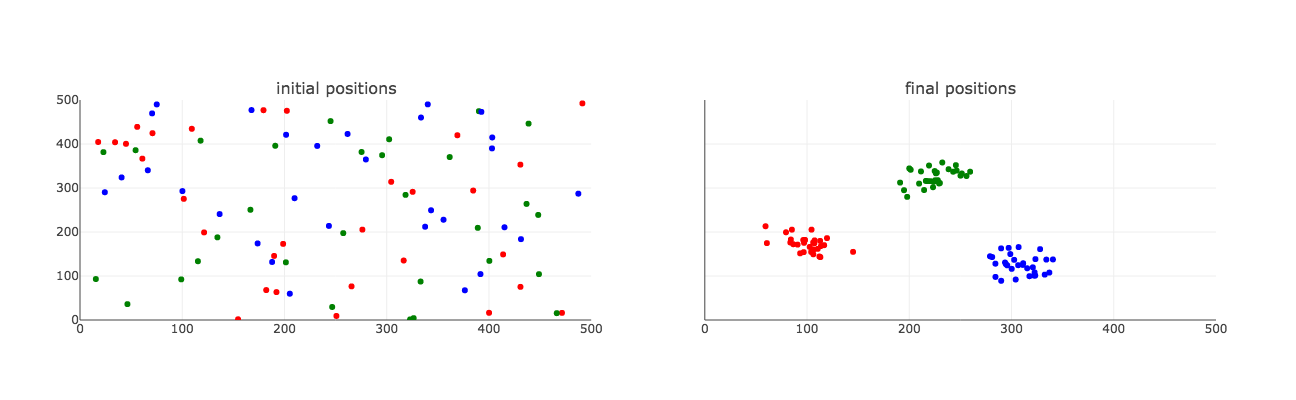

In [66]:
fig = tls.make_subplots(1, 2, subplot_titles=['initial positions', 'final positions'], shared_yaxes=True)

trace1 = dict(
    type= 'scatter',
    x= table.Xi,
    y= table.Yi,
    name='initial',
    marker= dict(color=table.color),
    mode= 'markers',
)

trace2 = dict(
    type= 'scatter',
    x= table.Xf,
    y= table.Yf,
    name='final',
    marker= dict(color=table.color),
    mode= 'markers',
)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig.layout.showlegend = False
fig.layout.width = 800
fig.layout.height = 400
fig.layout.xaxis1.range = [0, 500]
fig.layout.xaxis2.range = [0, 500]
fig.layout.yaxis1.range = [0, 500]

py.offline.iplot(fig)

## Use the figure outside the notebook

In [ ]:
# Create a stand-alone html file 
py.offline.plot(fig, filename='clusters.html') 

In [ ]:
# or just a <div> element with the plot to embed in your web page
div_str = py.offline.plot(fig, output_type='div', include_plotlyjs=False)

In [79]:
# And that string can be embedded in an html and host it in GitHub for example.

## Cufflinks

In [78]:
import cufflinks as cf

cf.offline.go_offline(connected=True)

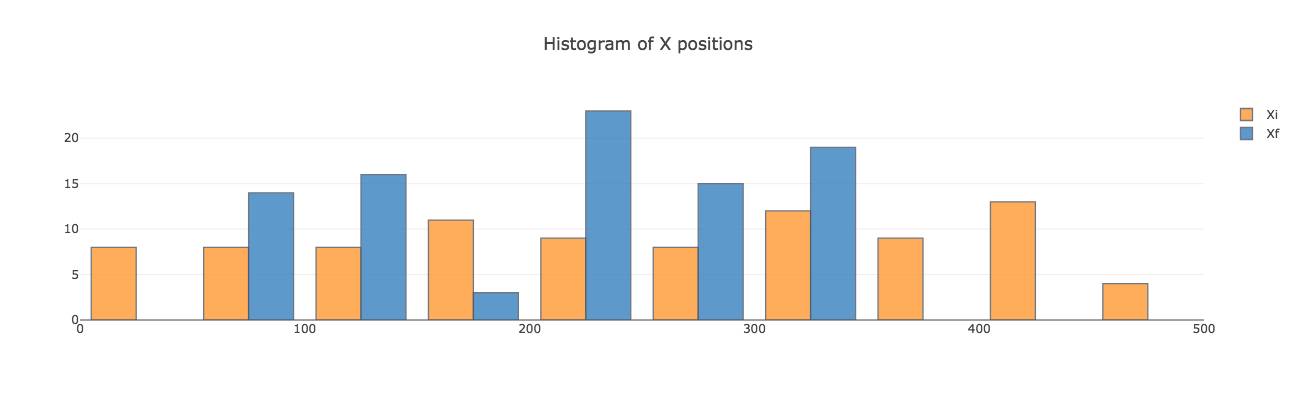

In [111]:
layout = dict(
    title='Histogram of X positions', 
    width=500, 
    height=400,
)

table[['Xi','Xf']].iplot(kind='histogram', barmode='group', layout=layout)

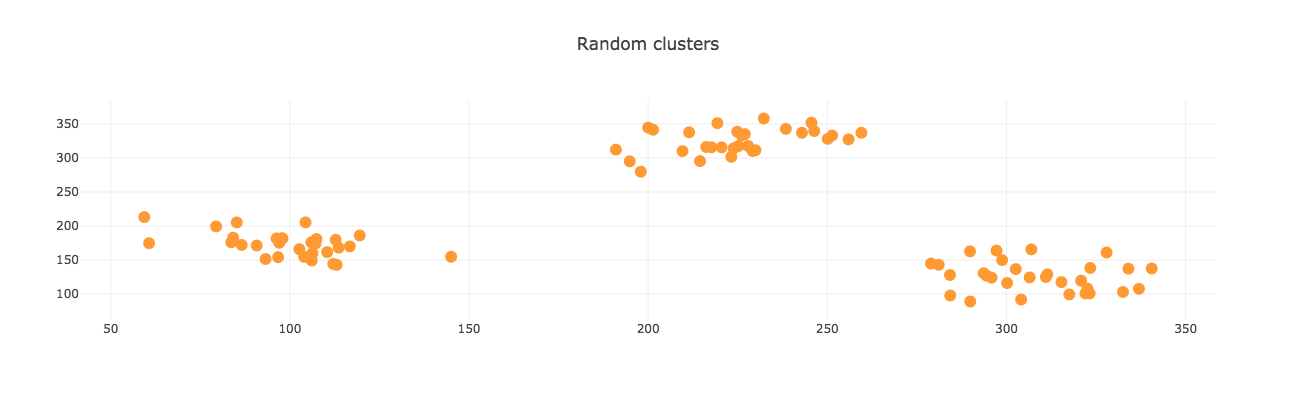

In [121]:
layout = dict(
    title= 'Random clusters',
    width= 500,
    height= 400,
)

table.iplot(kind='scatter', x='Xf', y='Yf', mode='markers', layout=layout)

In [ ]:
# The colors are assigned per column of the dataframe. Therefore, we need to split the clusters' data into different columns